<div style="
            border: 1px solid grey;
            border-radius: 15px;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; 
             background: linear-gradient(to right, #00b09b, #96c93d);">
    <i class="fa-play fa"
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;">
    </i>
    <div>
     <font color="white">To run the **selected** code cell, hit Ctrl + Enter</font>
    </div>
</div>

<div style="background: linear-gradient(to right, #007991, #78ffd6);
            border: 1px solid black;
            border-radius: 15px;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
        
 
    
            <i class="fa fa-angle-double-down"
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
    <div>
    <font color="white">**INTERACTIVE CORRELATION MATRICES**</font>
    </div>
    </div>

In [5]:
import numpy as np
import csv
import pandas as pd
from bokeh.plotting import *
from bokeh.models import HoverTool, ColumnDataSource, LinearColorMapper,ColorBar
import scipy.io
from scipy.io import loadmat
import matplotlib as plt
import matplotlib.cm as cm


#   ============================================================== FUNCTION DEF START
#   This function is available as a python script: bokehCorPlot.py 
#   Loaded using magic %load bokehCorPlot.py

#   bokehCorPlot reads field names from a cvs file (can be modified to read from MATLAB/Octave)
#   nodeFile: Path to the csv file e.g. ".../my_names.csv" 
#   corMatrix: Path to the native MATLAB/Octave file that includes correlation matrices (NxN) e.g. ".../myMatrix.mat"
#   matrixName: Variable name to the correlation matrix that is stored in the file addressed by corMatrix.
#   plotTitle: Title of the plot e.g. 'My Interactive Correlation Plot"
    
def bokehCorPlot(nodeFile1,nodeFile2,corMatrix,matrixName,plotTitle):
    
    nodes = pd.read_csv(nodeFile1)
    nodes['name'] = [str(x) for x in nodes['name']]
    names1 = list(nodes['name'])
    
    nodes = pd.read_csv(nodeFile2)
    nodes['name'] = [str(x) for x in nodes['name']]
    names2 = list(nodes['name'])
    
    mat = loadmat(corMatrix)
    cormat = np.array(mat[matrixName]); #matrixName here
    cormat = np.squeeze(cormat);
    shp = np.shape(cormat)
    sz = shp[1]
    n1 = []
    n2 = []
    color = []
    weight = []
    alpha = []

    for node1 in range(0,sz):
        for node2 in range(0,sz):
            n1.append(names1[node1])
            n2.append(names2[node2])
            value = cormat[node1][node2]
            weight.append(value)
            alpha.append(0.8)

    source = ColumnDataSource(data=dict(
            xname=n1,
            yname=n2,
            weight=weight,
            alpha=alpha,
            count=cormat.flatten()
            )
        )

    colormap =cm.get_cmap("rainbow") 
    bokehpalette = [plt.colors.rgb2hex(m) for m in colormap(np.arange(colormap.N))]

    color_mapper = LinearColorMapper(palette=bokehpalette, low=min(cormat.flatten()), high=max(cormat.flatten()))
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(2,0))   

    p = figure(title=plotTitle,
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(names1)), y_range=names2)

    p.plot_width = 500
    p.plot_height = 500
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "10pt"
    p.axis.axis_label_text_color =  None
    p.axis.major_label_standoff = 1
    p.xaxis.major_label_orientation = np.pi/3

    p.add_layout(color_bar, 'right')
    p.rect('xname', 'yname', 0.9, 0.9, source=source, alpha='alpha', line_color=None,
    hover_line_color='black',color={'field': 'count', 'transform': color_mapper})

    p.select_one(HoverTool).tooltips = [
    ('Pair', '@yname, @xname'),
    ('Pearson r', '@count'),
    ]

    p.toolbar.logo = None
    p.toolbar_location = None

    #output_file("correlation.html", title="Correlation Matix")
    return p

#   ============================================================== FUNCTION DEF END
output_notebook()
p1 = bokehCorPlot('Scan_names.csv','Scan_names.csv','CorrelationMatrices.mat','scanCorMatrix_wm','Session #1: SC (White Matter) Correlation')
p2 = bokehCorPlot('Scan_names.csv','Scan_names.csv','CorrelationMatrices.mat','scanCorMatrix_sc','Session #1: SC (Whole Body) Correlation')
p3 = bokehCorPlot('Rescan_names.csv','Rescan_names.csv','CorrelationMatrices.mat','rescanCorMatrix_wm','Session #2: SC (White Matter) Correlation')
p4 = bokehCorPlot('Rescan_names.csv','Rescan_names.csv','CorrelationMatrices.mat','rescanCorMatrix_sc','Session #2: SC (Whole Body) Correlation')
p5 = bokehCorPlot('session1Names.csv','session2Names.csv','betweenSessionCM.mat','wmCor_matrix','Between Sessions: SC (White Matter) Correlation')
p6 = bokehCorPlot('session1Names.csv','session2Names.csv','betweenSessionCM.mat','scCor_matrix','Between Sessions: SC (White Matter) Correlation')


show(gridplot([p1, p2, p3,p4,p5,p6], ncols=2, plot_width=450, plot_height=400, toolbar_location=None))

Loading BokehJS ...

<div style="background: linear-gradient(to right, #007991, #78ffd6);
            border: 1px solid grey;
            border-radius: 15px;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
            
           
            
                <i class="fa fa-angle-double-down"
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
    
    <div>
    <font color="white">**INTERACTIVE SCATTER PLOTS**</font>
    </div>
</div>

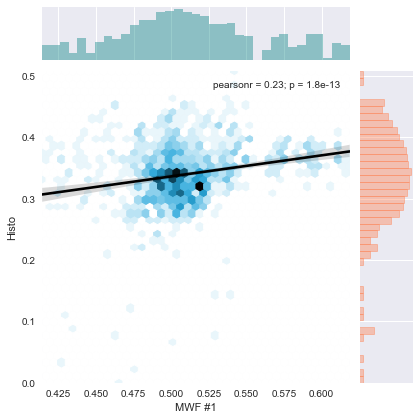

In [6]:
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons, Layout, Button, Box, VBox, Label
import matplotlib.pyplot as pltt

mat = loadmat('strData.mat', struct_as_record=False)
rescn = mat['imCorRescan']
scn   = mat['imCorScan']

rescanNames = []
scanNames   = []
for i in range(0, 5):
    rescanNames.append(str(*rescn[0,i].name))
    scanNames.append(str(*scn[0,i].name))


# Define section one widgets
section1RB = widgets.RadioButtons(
    options=['Session_1', 'Session_2'],
    description='Select session:',
    disabled=False
)
section1TB = widgets.ToggleButtons(options=scanNames)



# Define section two widgets
section2RB = widgets.RadioButtons(
    options=['Session_1', 'Session_2'],
    description='Select session:',
    disabled=False
)

# Define ROI
sectionROI = widgets.RadioButtons(
    options=['White_Matter', 'Whole_Spinal_Cord'],
    description='Select ROI:',
    disabled=False
)


section2TB = widgets.ToggleButtons(options=scanNames)


def clicked(b):
    clear_output()
    
        
    if (section1RB.value is 'Session_1'):
        section1TB.options = scanNames
        idx1 = scanNames.index(section1TB.value)
        
        if (sectionROI.value is 'White_Matter'):
            vec1 = np.array(scn[0,idx1].wmVec)
        else:       
            vec1 = np.array(scn[0,idx1].scVec)
        
        vec1 = np.squeeze(vec1)
        name1 = str(*scn[0,idx1].name)
        
    else:    
        section1TB.options = rescanNames
        idx1 = rescanNames.index(section1TB.value)
        
        if (sectionROI.value is 'White_Matter'):
            vec1 = np.array(rescn[0,idx1].wmVec)
        else:
            vec1 = np.array(rescn[0,idx1].scVec)
        
        vec1 = np.squeeze(vec1)
        name1 = str(*rescn[0,idx1].name)
    
    if (section2RB.value is 'Session_1'):
        section2TB.options = scanNames
        idx2 = scanNames.index(section2TB.value)
        if (sectionROI.value is 'White_Matter'):
            vec2 = np.array(scn[0,idx2].wmVec)
        else:
            vec2 = np.array(scn[0,idx2].scVec)
            
        vec2 = np.squeeze(vec2)
        name2 = str(*scn[0,idx2].name)
    else: 
        section2TB.options = rescanNames
        idx2 = rescanNames.index(section2TB.value)
        
        if (sectionROI.value is 'White_Matter'):
            vec2 = np.array(rescn[0,idx2].wmVec)
        else:
            vec2 = np.array(rescn[0,idx2].scVec)
        
        vec2 = np.squeeze(vec2)
        name2 = str(*rescn[0,idx2].name)
  
    foo = pd.DataFrame({name1: vec1, name2: vec2})
    g = sns.jointplot(x=name1, y=name2,data=foo, kind='hex', color='skyblue',marginal_kws={'hist_kws': {'histtype': 'barstacked','log':True,'cumulative': False,'color':'teal','linewidth':1}})
    pltt.setp(g.ax_marg_y.patches, color="coral")
    sns.regplot(vec1, vec2, ax=g.ax_joint, scatter=False, color = 'k')
    sns.plt.show() 

# Observe all widgets        
sectionROI.observe(clicked)
section1TB.observe(clicked)
section1RB.observe(clicked)
section2TB.observe(clicked)
section2RB.observe(clicked)



items1 = [section1RB,section1TB]
items2 = [section2RB,section2TB]
items3 = [sectionROI]


box_layout1 = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='3px solid teal',
                    width='76.5%',
                    margin='10px'
                    )

box_layout2 = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='3px solid coral',
                    width='76.5%',
                    margin='10px'
                    )

box_layout3 = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='3px solid grey',
                    width='76.5%',
                    margin='10px'
                    )

box1 = Box(children=items1, layout=box_layout1)
box2 = Box(children=items2, layout=box_layout2)
box3 = Box(children=items3, layout=box_layout3)


display(VBox([Label('ROI'), box3]))
display(VBox([Label('Selection 1'), box1]))
display(VBox([Label('Selection 2'), box2]))

<center><i class="fa fa-university" aria-hidden="true" style="font-size: 80px; text-align: center; padding: 8px"></i></center>

  
    
<center>The MIT License (MIT)</center>

<center>Copyright (c) 2014 Ecole Polytechnique, Université de Montréal</center>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<img src="https://avatars3.githubusercontent.com/u/7755716?v=4&s=200" align="center" style="width:128px;height:128px;">

